# Cross-Entropy and Kullback-Leiber divergence

Given a true distribution $p(x)$ of a random variable $X$ taking values of the set $S$ and an approximate distribution of that variable $q(x)$ the cross entropy is defined as
$$
H(p, q) = -\sum_{x\in S}p(x)\log(q(x))
$$
For binary values (i.e. labels) this becomes
$$
H(p, q) = -p\log(q)-(1-p)\log(1-q)
$$
As a function of $q$, $H(p, q)$ has a minimim when $q = p$ for all values. Hence minimizing the cross entropy means that the approximate distribution $q$ approaches the true distribution $p$.

The Kullback-Leiber divergence of the two distribution $p, q$ is defined as 
$$
D_{KL}(p||q) = \sum_{x\in S}p(x)\log(\frac{p(x)}{q(x)})
$$
and its relation to the cross-entropy is
$$
H(p, q) = H(p)+D_{KL}(p||q)
$$
$D_{KL}(p||q)$ is a measure of the difference of the true distribution $p(x)$ to the approximate distribution $q(x)$.  
However, it is not a metric since it is not symmetric and does not satisfy the triangular inequality.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\rigat\AppData\Local\Temp\ipykernel_9308\1605099454.py:4: RuntimeWarning: divide by zero encountered in log
  cross_entropy = lambda p, q: -p*np.log(q)-(1-p)*(np.log(1-q))


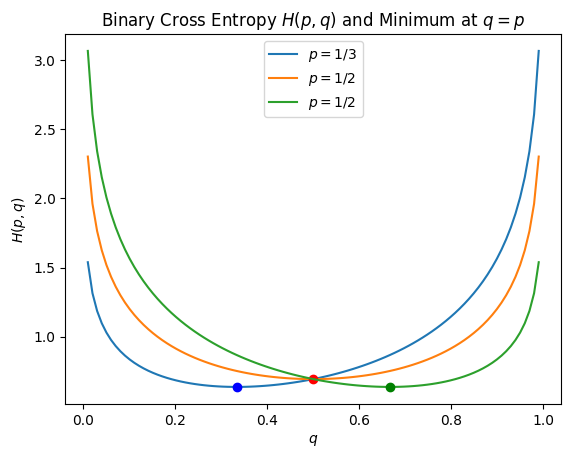

In [28]:
# visualize the binary cross entropy for different p values, and its minimum

q = np.linspace(0, 1, 100)
cross_entropy = lambda p, q: -p*np.log(q)-(1-p)*(np.log(1-q))

plt.plot(q, cross_entropy(1/3, q), label = '$p=1/3$')
plt.plot(1/3, cross_entropy(1/3, 1/3), 'o', c='b')
plt.plot(q, cross_entropy(1/2, q), label = '$p=1/2$')
plt.plot(1/2, cross_entropy(1/2, 1/2), 'o', c='r')
plt.plot(q, cross_entropy(2/3, q), label = '$p=1/2$')
plt.plot(2/3, cross_entropy(2/3, 2/3), 'o', c='g')

plt.title('Binary Cross Entropy $H(p, q)$ and Minimum at $q=p$')
plt.xlabel('$q$')
plt.ylabel('$H(p, q)$')
plt.legend()
plt.show()

In [34]:
# show that KL-divergence is not symmetric

kl_divergene = lambda p, q: np.sum(p*np.log(p/q))
# use just a binary distribution
p = np.array([1/3, 2/3])
q = np.array([1/10, 9/10])
print(f'KL(p, q) = {kl_divergene(p, q)}, while KL(q, p) = {kl_divergene(q, p)}')

KL(p, q) = 0.20125453980841987, while KL(q, p) = 0.14969685277271075
